In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/datafest')

In [ ]:
!ls "/content/drive/MyDrive/datafest"

datafest_sample  page_views.csv  responses.csv


In [ ]:
%cd /content/drive/MyDrive/datafest

/content/drive/MyDrive/datafest


In [ ]:
import pandas as pd
page_views = pd.read_csv("page_views.csv")
response = pd.read_csv("responses.csv")
checkpoints_EOC = pd.read_csv("checkpoints_eoc.csv")


<ipython-input-49-1e2dc1f23956>:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  page_views = pd.read_csv("page_views.csv")
<ipython-input-49-1e2dc1f23956>:3: DtypeWarning: Columns (34,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  response = pd.read_csv("responses.csv")


In [ ]:
EOC_sample_1book = checkpoints_EOC[(checkpoints_EOC['book'] == "College / Statistics and Data Science (ABC)")]


In [ ]:
EOC_sample_1book.head()

,student_id,class_id,chapter_number,book,EOC,n_possible,n_correct,n_attempt
0,001824fb-a2fd-431d-aef6-7a1250d97a62,074123e7-cd90-4500-86fe-286aaa733bf5,1,College / Statistics and Data Science (ABC),0.921053,38,35,40
1,001824fb-a2fd-431d-aef6-7a1250d97a62,074123e7-cd90-4500-86fe-286aaa733bf5,2,College / Statistics and Data Science (ABC),0.839080,87,73,127
2,001824fb-a2fd-431d-aef6-7a1250d97a62,074123e7-cd90-4500-86fe-286aaa733bf5,3,College / Statistics and Data Science (ABC),0.769231,104,80,145
3,001824fb-a2fd-431d-aef6-7a1250d97a62,074123e7-cd90-4500-86fe-286aaa733bf5,4,College / Statistics and Data Science (ABC),0.743590,118,87,217
4,001824fb-a2fd-431d-aef6-7a1250d97a62,074123e7-cd90-4500-86fe-286aaa733bf5,5,College / Statistics and Data Science (ABC),0.777778,63,49,90


In [ ]:
subset1 = ['book', 'chapter_number', 'section_number', 'student_id', 'dt_accessed', 'engaged']
page_views1 = page_views[subset1]

subset2 = ['book', 'dt_submitted', 'student_id', 'chapter_number']
responses_submitted = response[subset2]



In [ ]:
page_views1 = page_views[subset1]
page_views1['access'] = pd.to_datetime(page_views1['dt_accessed']).dt.strftime('%Y-%m-%d %H:%M:%S')
page_views1 = page_views1.drop('dt_accessed', axis=1)
page_views1.sort_values(by=['student_id', 'chapter_number', 'access'])
page_views1.head()

<ipython-input-160-25efa0417756>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  page_views1['access'] = pd.to_datetime(page_views1['dt_accessed']).dt.strftime('%Y-%m-%d %H:%M:%S')


,book,chapter_number,section_number,student_id,engaged,access
0,College / Statistics and Data Science (ABC),1.0,3.0,953768c5-32fa-4190-8fee-1da82d8710bc,10857.0,2023-01-06 00:47:06
1,College / Statistics and Data Science (ABC),1.0,3.0,953768c5-32fa-4190-8fee-1da82d8710bc,620302.0,2023-01-14 04:41:55
2,College / Statistics and Data Science (ABC),1.0,3.0,953768c5-32fa-4190-8fee-1da82d8710bc,793964.0,2023-01-14 20:15:03
3,College / Statistics and Data Science (ABC),1.0,4.0,953768c5-32fa-4190-8fee-1da82d8710bc,6250.0,2023-01-06 00:46:58
4,College / Statistics and Data Science (ABC),1.0,4.0,953768c5-32fa-4190-8fee-1da82d8710bc,30885.0,2023-01-14 23:51:24


In [ ]:
page_views2 = page_views1[(page_views1['chapter_number'] == 1.0)]
min_access_times = page_views2.groupby('student_id').min()
min_access_times

,book,chapter_number,section_number,engaged,access
student_id,,,,,
001824fb-a2fd-431d-aef6-7a1250d97a62,College / Statistics and Data Science (ABC),1.0,3.0,452.0,2022-12-17 06:17:47
041a771b-41cc-4b36-928d-ec321f918db5,College / Advanced Statistics and Data Science...,1.0,3.0,3345.0,2023-04-04 18:28:30
04347fe5-e55a-4adc-86f2-a156ddfcfc13,College / Advanced Statistics and Data Science...,1.0,3.0,3237.0,2023-03-31 18:58:57
045d0e87-585c-4126-a2c0-c744effb11b2,College / Advanced Statistics and Data Science...,1.0,3.0,13113.0,2023-01-09 00:00:39
05588964-8577-4b9f-9a5e-ddb770184d3c,College / Advanced Statistics and Data Science...,1.0,3.0,358.0,2023-04-05 05:24:28
...,...,...,...,...,...
fc8583cc-315d-4240-a516-ab7e4640ccaa,College / Statistics and Data Science (ABC),1.0,3.0,1614.0,2022-12-19 05:32:16
fcdfb64b-0dd7-4839-a76d-1bd3d688d5c0,College / Statistics and Data Science (ABC),1.0,3.0,893.0,2023-06-29 03:00:41
fd2a1c41-0bc1-47c6-8ab3-d238a9a648ef,College / Statistics and Data Science (ABC),1.0,3.0,3385.0,2023-01-28 22:10:35


In [ ]:
dfs = []

for num in range(1, 17):
    page_views2 = page_views1[(page_views1['chapter_number'] == num)]
    min_access_times = page_views2.groupby('student_id').min()
    dfs.append(min_access_times)

page_views3 = pd.concat(dfs)
page_views3 = page_views3.sort_values(by=['student_id', 'chapter_number'])
#page_views3.reset_index(inplace=True)

<ipython-input-162-bbca6b3a0a0e>:5: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  min_access_times = page_views2.groupby('student_id').min()


In [ ]:
page_views3

,book,chapter_number,section_number,engaged,access
student_id,,,,,
001824fb-a2fd-431d-aef6-7a1250d97a62,College / Statistics and Data Science (ABC),1.0,3.0,452.0,2022-12-17 06:17:47
001824fb-a2fd-431d-aef6-7a1250d97a62,College / Statistics and Data Science (ABC),2.0,1.0,0.0,2022-12-17 23:22:55
001824fb-a2fd-431d-aef6-7a1250d97a62,College / Statistics and Data Science (ABC),3.0,1.0,437.0,2023-01-14 01:39:23
001824fb-a2fd-431d-aef6-7a1250d97a62,College / Statistics and Data Science (ABC),4.0,1.0,20530.0,2023-01-18 21:40:10
001824fb-a2fd-431d-aef6-7a1250d97a62,College / Statistics and Data Science (ABC),5.0,1.0,1261.0,2023-01-21 09:27:51
...,...,...,...,...,...
fef083e8-7167-4f42-82d5-d2e893aa408a,College / Statistics and Data Science (ABC),7.0,1.0,4740.0,NaN
fef083e8-7167-4f42-82d5-d2e893aa408a,College / Statistics and Data Science (ABC),8.0,1.0,17096.0,2023-02-07 22:19:26
fef083e8-7167-4f42-82d5-d2e893aa408a,College / Statistics and Data Science (ABC),9.0,1.0,0.0,2023-03-14 03:36:37


In [ ]:
# change the format to datetime
response1 = response[subset2]
response1['submit'] = pd.to_datetime(response1['dt_submitted']).dt.strftime('%Y-%m-%d %H:%M:%S')
response1 = response1.drop('dt_submitted', axis=1)
response1.sort_values(by=['student_id', 'chapter_number', 'submit'])
response1.head()

<ipython-input-164-aab59659f7b3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response1['submit'] = pd.to_datetime(response1['dt_submitted']).dt.strftime('%Y-%m-%d %H:%M:%S')


,book,student_id,chapter_number,submit
0,College / Advanced Statistics and Data Science...,0780b2c5-b260-4a31-816e-e91ce8b403a0,1.0,2023-04-04 06:19:03
1,College / Advanced Statistics and Data Science...,ceacd30b-36ff-413e-9d7d-c389ad5086cf,1.0,2023-04-04 05:36:51
2,College / Advanced Statistics and Data Science...,ba593149-8b3c-4e1e-8df9-2b470c49a4f4,1.0,2023-04-09 23:27:47
3,College / Advanced Statistics and Data Science...,1bacdb33-5165-44c1-9aa5-b6a904e6c463,1.0,2023-04-09 22:55:57
4,College / Advanced Statistics and Data Science...,646acd2f-5a8b-4629-b753-faff3ff49b8c,1.0,2023-04-09 23:10:08


In [ ]:
dfs = []

for num in range(1, 17):
    response2 = response1[(response1['chapter_number'] == num)]
    max_submit_times = response2.groupby('student_id').max()
    dfs.append(max_submit_times)

response3 = pd.concat(dfs)
response3 = response3.sort_values(by=['student_id', 'chapter_number'])

In [ ]:
response3

,book,chapter_number,submit
student_id,,,
001824fb-a2fd-431d-aef6-7a1250d97a62,College / Statistics and Data Science (ABC),1.0,2022-12-17 23:22:17
001824fb-a2fd-431d-aef6-7a1250d97a62,College / Statistics and Data Science (ABC),2.0,2023-01-14 01:36:57
001824fb-a2fd-431d-aef6-7a1250d97a62,College / Statistics and Data Science (ABC),3.0,2023-01-18 21:40:03
001824fb-a2fd-431d-aef6-7a1250d97a62,College / Statistics and Data Science (ABC),4.0,2023-01-21 09:13:23
001824fb-a2fd-431d-aef6-7a1250d97a62,College / Statistics and Data Science (ABC),5.0,2023-01-25 08:39:50
...,...,...,...
fef083e8-7167-4f42-82d5-d2e893aa408a,College / Statistics and Data Science (ABC),7.0,2023-02-07 22:19:19
fef083e8-7167-4f42-82d5-d2e893aa408a,College / Statistics and Data Science (ABC),8.0,2023-02-21 21:00:36
fef083e8-7167-4f42-82d5-d2e893aa408a,College / Statistics and Data Science (ABC),9.0,2023-03-23 20:07:12


In [ ]:
merged_page_response = pd.merge(page_views3, response3, on=['student_id', 'chapter_number'], how='outer')
merged_page_response['submit'] = pd.to_datetime(merged_page_response['submit'])
merged_page_response['access'] = pd.to_datetime(merged_page_response['access'])
merged_page_response['learning_duration'] = (merged_page_response['submit'] - merged_page_response['access'])
merged_page_response = merged_page_response[pd.notnull(merged_page_response['learning_duration'])]
merged_page_response['learning_duration_rounded'] = merged_page_response['learning_duration'].dt.days.astype(int)
merged_page_response = merged_page_response.drop('learning_duration', axis = 1)
merged_page_response = merged_page_response.drop('book_y', axis = 1)
merged_page_response.to_csv("/content/drive/MyDrive/datafest" + "/learning_time_table.csv", index=False)
merged_page_response

,book_x,chapter_number,section_number,engaged,access,submit,learning_duration_rounded
student_id,,,,,,,
001824fb-a2fd-431d-aef6-7a1250d97a62,College / Statistics and Data Science (ABC),1.0,3.0,452.0,2022-12-17 06:17:47,2022-12-17 23:22:17,0
001824fb-a2fd-431d-aef6-7a1250d97a62,College / Statistics and Data Science (ABC),2.0,1.0,0.0,2022-12-17 23:22:55,2023-01-14 01:36:57,27
001824fb-a2fd-431d-aef6-7a1250d97a62,College / Statistics and Data Science (ABC),3.0,1.0,437.0,2023-01-14 01:39:23,2023-01-18 21:40:03,4
001824fb-a2fd-431d-aef6-7a1250d97a62,College / Statistics and Data Science (ABC),4.0,1.0,20530.0,2023-01-18 21:40:10,2023-01-21 09:13:23,2
001824fb-a2fd-431d-aef6-7a1250d97a62,College / Statistics and Data Science (ABC),5.0,1.0,1261.0,2023-01-21 09:27:51,2023-01-25 08:39:50,3
...,...,...,...,...,...,...,...
fe5182ec-6732-402e-91f6-a5ddec5107ba,College / Statistics and Data Science (ABC),9.0,1.0,9134.0,2023-05-03 23:24:15,2023-05-09 00:00:46,5
fef083e8-7167-4f42-82d5-d2e893aa408a,College / Statistics and Data Science (ABC),8.0,1.0,17096.0,2023-02-07 22:19:26,2023-02-21 21:00:36,13
fef083e8-7167-4f42-82d5-d2e893aa408a,College / Statistics and Data Science (ABC),9.0,1.0,0.0,2023-03-14 03:36:37,2023-03-23 20:07:12,9


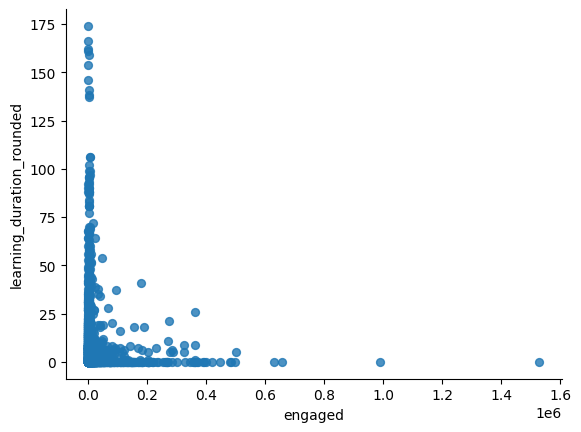

In [ ]:
# @title engaged vs learning_duration_rounded

from matplotlib import pyplot as plt
merged_page_response.plot(kind='scatter', x='engaged', y='learning_duration_rounded', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

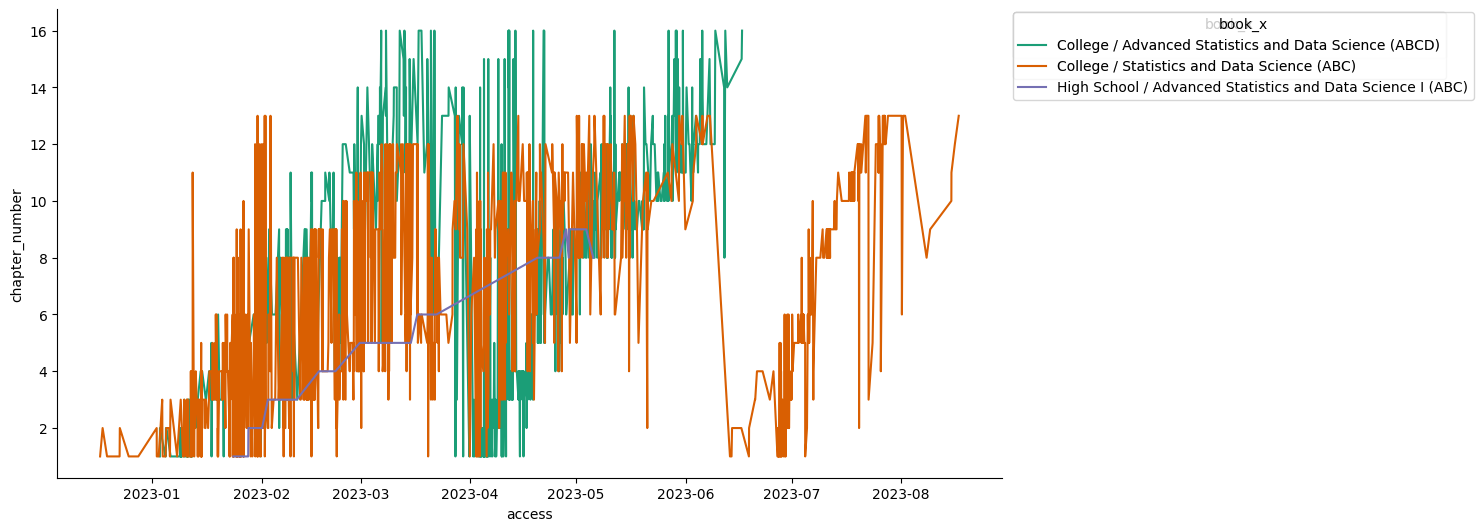

In [ ]:
# @title access vs chapter_number

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['access']
  ys = series['chapter_number']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = merged_page_response.sort_values('access', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('book_x')):
  _plot_series(series, series_name, i)
  fig.legend(title='book_x', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('access')
_ = plt.ylabel('chapter_number')

**Improvement** \
1.join on class_id \
2.more variables \
3.section remained \
4 sum(engaged time) \

In [ ]:
subset1 = ['book', 'chapter_number', 'section_number', 'student_id', 'dt_accessed', 'engaged', 'was_complete',
          'idle_brief', 'idle_long', 'off_page_brief', 'off_page_long']
page_views1 = page_views[subset1]
page_views1.dropna(inplace=True)

subset2 = ['book', 'dt_submitted', 'student_id', 'chapter_number']
responses2 = response[subset2]
page_views1.dropna(inplace=True)

<ipython-input-179-8c1cc604be86>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  page_views1.dropna(inplace=True)
<ipython-input-179-8c1cc604be86>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  page_views1.dropna(inplace=True)


In [ ]:
page_views1 = page_views[subset1]
page_views1['access'] = pd.to_datetime(page_views1['dt_accessed']).dt.strftime('%Y-%m-%d %H:%M:%S')
page_views1 = page_views1.drop('dt_accessed', axis=1)
page_views1.sort_values(by=['student_id', 'chapter_number', 'access'])
page_views1.head()

<ipython-input-182-25efa0417756>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  page_views1['access'] = pd.to_datetime(page_views1['dt_accessed']).dt.strftime('%Y-%m-%d %H:%M:%S')


,book,chapter_number,section_number,student_id,engaged,was_complete,idle_brief,idle_long,off_page_brief,off_page_long,access
0,College / Statistics and Data Science (ABC),1.0,3.0,953768c5-32fa-4190-8fee-1da82d8710bc,10857.0,False,0.0,0.0,0.0,0.0,2023-01-06 00:47:06
1,College / Statistics and Data Science (ABC),1.0,3.0,953768c5-32fa-4190-8fee-1da82d8710bc,620302.0,False,188748.0,0.0,0.0,0.0,2023-01-14 04:41:55
2,College / Statistics and Data Science (ABC),1.0,3.0,953768c5-32fa-4190-8fee-1da82d8710bc,793964.0,True,0.0,0.0,0.0,0.0,2023-01-14 20:15:03
3,College / Statistics and Data Science (ABC),1.0,4.0,953768c5-32fa-4190-8fee-1da82d8710bc,6250.0,False,0.0,0.0,0.0,0.0,2023-01-06 00:46:58
4,College / Statistics and Data Science (ABC),1.0,4.0,953768c5-32fa-4190-8fee-1da82d8710bc,30885.0,True,0.0,0.0,0.0,0.0,2023-01-14 23:51:24


In [ ]:
dfs = []

chapt_nums = [1,2,3,4,5,6,8,9,10,11,12,13,14,15,16]
for num in chapt_nums:
    page_views2 = page_views1[(page_views1['chapter_number'] == num)]
    aggregations = {
    'access': 'min',
    'engaged': 'sum',
    'idle_brief': 'sum',
    'idle_long': 'sum',
    'off_page_brief': 'sum',
    'off_page_long': 'sum'
    }
    grouped_df = page_views2.groupby('student_id').agg(aggregations)
    grouped_df['chapter_number'] = num
    dfs.append(grouped_df)

page_views3 = pd.concat(dfs)
page_views3 = page_views3.sort_values(by=['student_id', 'chapter_number'])
page_views3

,access,engaged,idle_brief,idle_long,off_page_brief,off_page_long,chapter_number
student_id,,,,,,,
001824fb-a2fd-431d-aef6-7a1250d97a62,2022-12-17 06:17:47,5663330.0,2539580.0,0.0,6964632.0,28824125.0,1
001824fb-a2fd-431d-aef6-7a1250d97a62,2022-12-17 23:22:55,30902762.0,7473187.0,10640285.0,26293671.0,269960414.0,2
001824fb-a2fd-431d-aef6-7a1250d97a62,2023-01-14 01:39:23,34127489.0,1841254.0,0.0,16519054.0,65880895.0,3
001824fb-a2fd-431d-aef6-7a1250d97a62,2023-01-18 21:40:10,18987025.0,2935704.0,3993823.0,32555608.0,262471188.0,4
001824fb-a2fd-431d-aef6-7a1250d97a62,2023-01-21 09:27:51,15971898.0,6534061.0,6761110.0,19225192.0,320442569.0,5
...,...,...,...,...,...,...,...
fe5182ec-6732-402e-91f6-a5ddec5107ba,2023-05-03 23:24:15,2354990.0,1643511.0,0.0,886003.0,0.0,9
fef083e8-7167-4f42-82d5-d2e893aa408a,2023-02-07 22:19:26,15435994.0,819913.0,0.0,5468868.0,48563658.0,8
fef083e8-7167-4f42-82d5-d2e893aa408a,2023-03-14 03:36:37,14248225.0,6096878.0,54002644.0,7227950.0,81826501.0,9


In [ ]:
page_views2 = page_views1[(page_views1['chapter_number'] == 7)]
aggregations = {
    'access': 'min',
    'engaged': 'sum',
    'idle_brief': 'sum',
    'idle_long': 'sum',
    'off_page_brief': 'sum',
    'off_page_long': 'sum'
}

# Group by 'student_id' and apply the aggregations
grouped_df = page_views2.groupby('student_id').agg(aggregations)
grouped_df['chapter_number'] = num
grouped_df

TypeError: '<=' not supported between instances of 'str' and 'float'

In [ ]:
response1 = response[subset2]
response1['submit'] = pd.to_datetime(response1['dt_submitted']).dt.strftime('%Y-%m-%d %H:%M:%S')
response1 = response1.drop('dt_submitted', axis=1)
response1.sort_values(by=['student_id', 'chapter_number', 'submit'])
response1.head()

<ipython-input-217-ffd9d931493c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response1['submit'] = pd.to_datetime(response1['dt_submitted']).dt.strftime('%Y-%m-%d %H:%M:%S')


,book,student_id,chapter_number,submit
0,College / Advanced Statistics and Data Science...,0780b2c5-b260-4a31-816e-e91ce8b403a0,1.0,2023-04-04 06:19:03
1,College / Advanced Statistics and Data Science...,ceacd30b-36ff-413e-9d7d-c389ad5086cf,1.0,2023-04-04 05:36:51
2,College / Advanced Statistics and Data Science...,ba593149-8b3c-4e1e-8df9-2b470c49a4f4,1.0,2023-04-09 23:27:47
3,College / Advanced Statistics and Data Science...,1bacdb33-5165-44c1-9aa5-b6a904e6c463,1.0,2023-04-09 22:55:57
4,College / Advanced Statistics and Data Science...,646acd2f-5a8b-4629-b753-faff3ff49b8c,1.0,2023-04-09 23:10:08


In [ ]:
dfs = []

for num in range(1, 17):
    response2 = response1[(response1['chapter_number'] == num)]
    max_submit_times = response2.groupby('student_id').max()
    dfs.append(max_submit_times)

response3 = pd.concat(dfs)
response3 = response3.sort_values(by=['student_id', 'chapter_number'])

In [ ]:
merged_page_response = pd.merge(page_views3, response3, on=['student_id', 'chapter_number'], how='outer')
merged_page_response['submit'] = pd.to_datetime(merged_page_response['submit'])
merged_page_response['access'] = pd.to_datetime(merged_page_response['access'])
merged_page_response['learning_duration'] = (merged_page_response['submit'] - merged_page_response['access'])
merged_page_response = merged_page_response[pd.notnull(merged_page_response['learning_duration'])]
merged_page_response['learning_duration_rounded'] = merged_page_response['learning_duration'].dt.total_seconds() // 3600
merged_page_response = merged_page_response.drop('learning_duration', axis = 1)
merged_page_response.to_csv("/content/drive/MyDrive/datafest" + "/learning_time_table2.csv", index=True)
merged_page_response

,access,engaged,idle_brief,idle_long,off_page_brief,off_page_long,chapter_number,book,submit,learning_duration_rounded
student_id,,,,,,,,,,
001824fb-a2fd-431d-aef6-7a1250d97a62,2022-12-17 06:17:47,5663330.0,2539580.0,0.0,6964632.0,28824125.0,1.0,College / Statistics and Data Science (ABC),2022-12-17 23:22:17,17.0
001824fb-a2fd-431d-aef6-7a1250d97a62,2022-12-17 23:22:55,30902762.0,7473187.0,10640285.0,26293671.0,269960414.0,2.0,College / Statistics and Data Science (ABC),2023-01-14 01:36:57,650.0
001824fb-a2fd-431d-aef6-7a1250d97a62,2023-01-14 01:39:23,34127489.0,1841254.0,0.0,16519054.0,65880895.0,3.0,College / Statistics and Data Science (ABC),2023-01-18 21:40:03,116.0
001824fb-a2fd-431d-aef6-7a1250d97a62,2023-01-18 21:40:10,18987025.0,2935704.0,3993823.0,32555608.0,262471188.0,4.0,College / Statistics and Data Science (ABC),2023-01-21 09:13:23,59.0
001824fb-a2fd-431d-aef6-7a1250d97a62,2023-01-21 09:27:51,15971898.0,6534061.0,6761110.0,19225192.0,320442569.0,5.0,College / Statistics and Data Science (ABC),2023-01-25 08:39:50,95.0
...,...,...,...,...,...,...,...,...,...,...
fe5182ec-6732-402e-91f6-a5ddec5107ba,2023-05-03 23:24:15,2354990.0,1643511.0,0.0,886003.0,0.0,9.0,College / Statistics and Data Science (ABC),2023-05-09 00:00:46,120.0
fef083e8-7167-4f42-82d5-d2e893aa408a,2023-02-07 22:19:26,15435994.0,819913.0,0.0,5468868.0,48563658.0,8.0,College / Statistics and Data Science (ABC),2023-02-21 21:00:36,334.0
fef083e8-7167-4f42-82d5-d2e893aa408a,2023-03-14 03:36:37,14248225.0,6096878.0,54002644.0,7227950.0,81826501.0,9.0,College / Statistics and Data Science (ABC),2023-03-23 20:07:12,232.0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 77.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 65.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 69.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 72.0% of the points cannot be plac

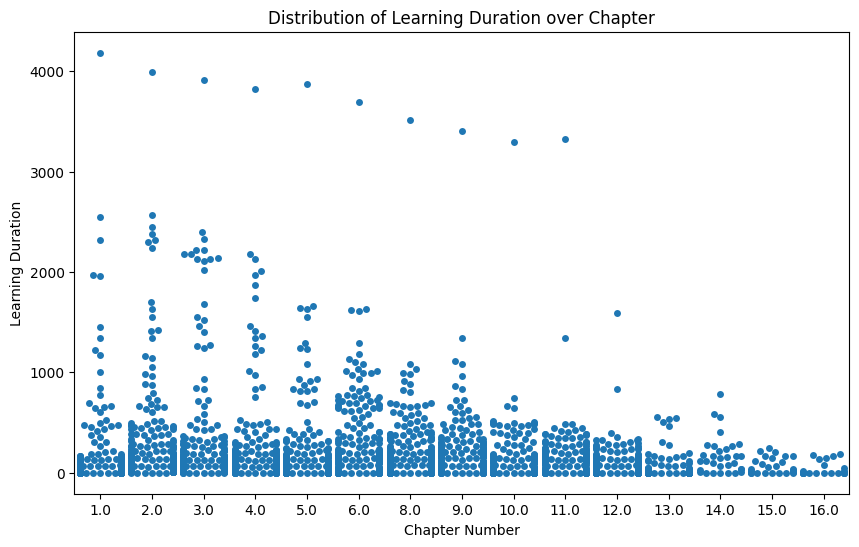

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.swarmplot(x='chapter_number', y='learning_duration_rounded', data=merged_page_response)
plt.title('Distribution of Learning Duration over Chapter')
plt.xlabel('Chapter Number')
plt.ylabel('Learning Duration')
plt.show()

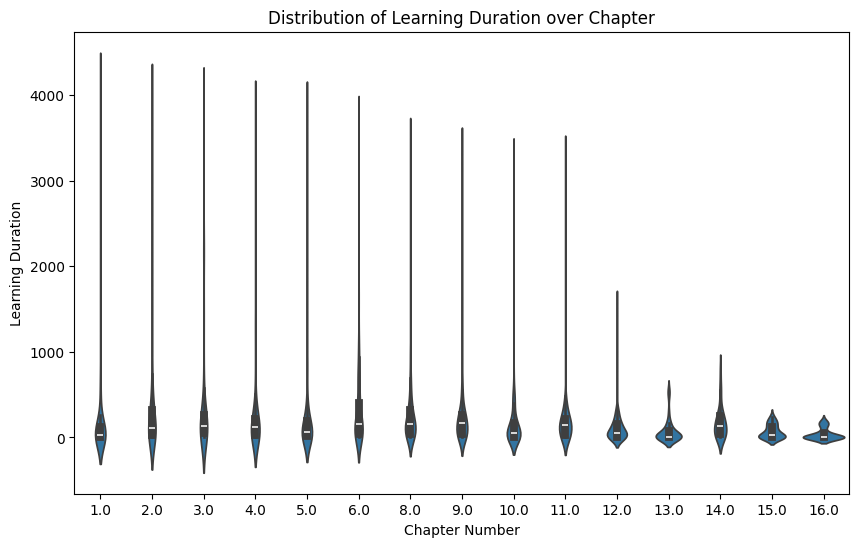

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='chapter_number', y='learning_duration_rounded', data=merged_page_response)
plt.title('Distribution of Learning Duration over Chapter')
plt.xlabel('Chapter Number')
plt.ylabel('Learning Duration')
plt.show()

<ipython-input-224-025d6e0c8067>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(merged_page_response, x='engaged', y='book', inner='box', palette='Dark2')


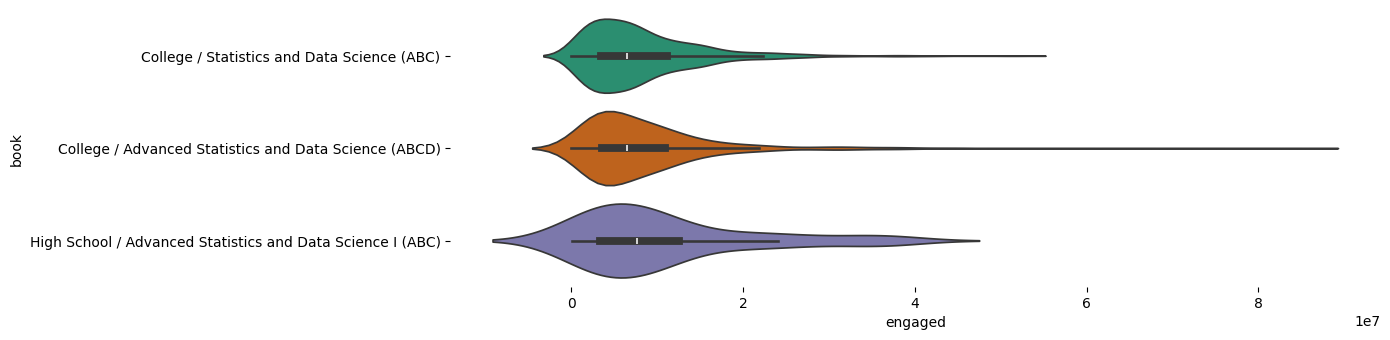

In [ ]:
# @title book vs engaged

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(merged_page_response['book'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(merged_page_response, x='engaged', y='book', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)